In [1]:
import numpy as np
import irreducible_library as irr
import os, sys
import matplotlib.pyplot as plt
import scipy
import matplotlib as mpl
mpl.rcParams.update(mpl.rcParamsDefault)
%matplotlib inline
%load_ext autoreload
plt.style.use('default')
from matplotlib import rc, colors
# Make use of TeX\ufeff

plt.rcParams['mathtext.fontset'] = 'cm'#'stix'
plt.rcParams['font.family'] = 'STIXGeneral'

rc('font',**{'size':16, 'family':'serif','serif':['Times New Roman']})
#plt.rcParams['text.usetex'] = True

In [349]:
#everything in units where c=hbar=1 and the energies are in MeV
me = 0.511
mmu=105.658
alpha_em = 1/137.
e = np.sqrt(alpha_em*4*np.pi)
Mpl = 2.435e21 #reduced planck mass (i.e. factor of 8 pi)
cm2_conv = 2.5e21
costhetaW = 0.881
mx1 = 1e-3
mx2 = 0.1e-3
mx3 = 10e-3
mx4 = 100e-3
Q=1e-14
Q2 = 1e-12
gx1 = Q*10**6
gx2 = Q

In [272]:
#Hubble
Tlist = np.logspace(1,-4,num = 50)
alist = np.logspace(-1.9, 4.5,num = 500)
H = np.array([irr.H(irr.a(i)) for i in Tlist])
H1 = np.array([irr.H(i) for i in alist])

In [375]:
n_e = np.array([irr.n_e(i) for i in irr.T(alist)])
nx = irr.relic_ann(1e-9,1e-9,whole_shebang=True)

[5.84630729e-06]


In [382]:
nx = irr.relic_plas(1e-19,3e-9,whole_shebang=True)

[1.84387432e-24]


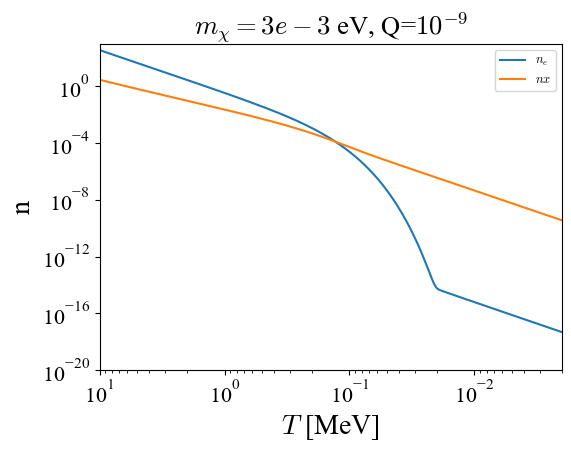

In [387]:
f, ax=plt.subplots()
f.set_figwidth(6)

ax.loglog(irr.T(alist), n_e,label=r'$n_e$')
ax.loglog(irr.T(alist), nx*10**(20),label=r'$nx$')
#ax.loglog(irr.T(alist), np.array([irr.n_e(i) for i in irr.T(alist)]),label=r'$n_e$')

ax.set_xlabel('$T$ [MeV]',fontsize=20)
ax.set_ylabel('n',fontsize=20)
ax.set_title(r"$m_\chi=3e-3$ eV, Q=$10^{-9}$")
ax.set_xlim([10,10**(-2.7)])
ax.set_ylim([1e-20,1000])
ax.legend(fontsize = 9)
f.tight_layout()
plt.show()

In [365]:
g_plas = irr.relic_plas(1e-12,10e-3,whole_shebang=True)

/Users/ellailes/Code/Irreducible-mcp/irreducible_library.py:217: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  return fsolve(lambda w: Pi_t(T, k, w)+k**2-w**2, k)
/Users/ellailes/Code/Irreducible-mcp/irreducible_library.py:207: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  return fsolve(lambda w: Pi_ell(T, k, w)-k**2, k)
/Users/ellailes/Code/Irreducible-mcp/irreducible_library.py:452: RuntimeWarning: overflow encountered in exp
  /(3*wt*mt**2 *(np.exp(wt/T)-1))


[0.00032123]


In [361]:
g_ann = irr.relic_ann(1e-12,1,whole_shebang=True)
g_plas = irr.relic_plas(1e-12,1,whole_shebang=True)
T_final = irr.T(alist[-1])
print(T_final)

[0.00261532]


/Users/ellailes/Code/Irreducible-mcp/irreducible_library.py:217: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  return fsolve(lambda w: Pi_t(T, k, w)+k**2-w**2, k)


[0.00046522]
4.4012177315587145e-05


In [367]:
s_curr = 2 *np.pi**2 *T_final**3* (2 + 7/8 * 6* 4/11)/45
print(g_ann[-1]/(s_curr*e**4))
print(g_plas[-1]/(s_curr*e**2))


1.3550987609768783e-07
1.5266993825571503e-07


In [273]:
# plasmon DM production
gamma_plas1 = np.array([(irr.gamma_long(Q,mx1,i)+irr.gamma_trans(Q,mx1,i))/(4*1.3*i**3/np.pi**2) for i in Tlist])
gamma_plas2 = np.array([(irr.gamma_long(Q,mx2,i)+irr.gamma_trans(Q,mx2,i))/(4*1.3*i**3/np.pi**2) for i in Tlist])
gamma_plas3 = np.array([(irr.gamma_long(Q,mx3,i)+irr.gamma_trans(Q,mx3,i))/(4*1.3*i**3/np.pi**2) for i in Tlist])

gamma_plas =  np.array([(irr.gamma_long(Q,mx1,i)+irr.gamma_trans(Q,mx1,i))*(4*1.3*i**3/np.pi**2) for i in Tlist])# 


In [250]:
# annihilation DM production
gamma_ann1 = np.array([irr.gamma_ann(Q,mx1,i)/irr.n_e(i) for i in Tlist])
gamma_ann2 = np.array([irr.gamma_ann(Q,mx2,i)/irr.n_e(i) for i in Tlist])
gamma_ann3 = np.array([irr.gamma_ann(Q,mx3,i)/irr.n_e(i) for i in Tlist])

gamma_ann = np.array([irr.gamma_ann(Q,mx1,i)*irr.n_e(i) for i in Tlist])

In [350]:
nx1 = irr.relic(Q, mx1,whole_shebang = True)
nx2 = irr.relic(Q, mx2,whole_shebang = True)
nx3 = irr.relic(Q, mx3,whole_shebang = True)

/Users/ellailes/Code/Irreducible-mcp/irreducible_library.py:217: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  return fsolve(lambda w: Pi_t(T, k, w)+k**2-w**2, k)
/Users/ellailes/Code/Irreducible-mcp/irreducible_library.py:207: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  return fsolve(lambda w: Pi_ell(T, k, w)-k**2, k)
/Users/ellailes/Code/Irreducible-mcp/irreducible_library.py:452: RuntimeWarning: overflow encountered in exp
  /(3*wt*mt**2 *(np.exp(wt/T)-1))


[6.28920558e-09]
[6.67495353e-10]
[3.79698261e-08]


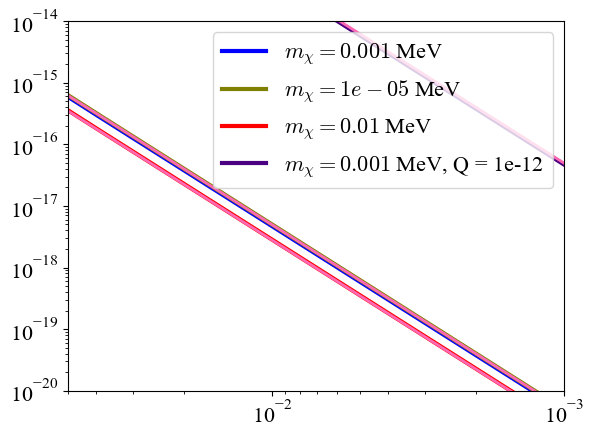

In [311]:
f, ax = plt.subplots()
alist = np.logspace(-1.9, 4.5,num = 500)
def N(m,i,Q):
    if (m < 1e-3):
        return (4.95e-12)*(Q/1e-14)**2*i**3
    else:
        return (4.95e-12)*(1e-3/m)**(1/4)*(Q/1e-14)**2*i**3
#ax.loglog(irr.T(alist), relic40_new/irr.nxrelic(0.04, irr.T(100))*alist**3/100**3,lw=2,c='SlateBlue',label = 'Total')
#ax.loglog(irr.T(alist), relic_plas40_new/irr.nxrelic(0.04, irr.T(100))*alist**3/100**3,lw=2,c='mediumvioletred',label = '$\gamma$')
ax.loglog(irr.T(alist), nx1,lw=3,c='blue',label = f'$m_\chi={mx1}$ MeV')
ax.loglog(irr.T(alist), np.array([N(mx1,i,Q) for i in irr.T(alist)]),lw=2,c='hotpink')
ax.set_xlim([0.05,10**(-3)])

ax.loglog(irr.T(alist), nx2,lw=3,c='olive',label = f'$m_\chi={mx2}$ MeV')
ax.loglog(irr.T(alist), np.array([N(mx2,i,Q) for i in irr.T(alist)]),lw=2,c='hotpink')
ax.set_ylim([1e-20,1e-14])

ax.loglog(irr.T(alist), nx3,lw=3,c='red',label = f'$m_\chi={mx3}$ MeV')
ax.loglog(irr.T(alist), np.array([N(mx3,i,Q) for i in irr.T(alist)]),lw=2,c='hotpink')

#ax.loglog(irr.T(alist), nx4,lw=3,c='blue',label = f'$m_\chi={mx4}$ MeV')
#ax.loglog(irr.T(alist), np.array([N(mx4,i,Q) for i in irr.T(alist)]),lw=2,c='green')

#ax.loglog(irr.T(alist), nx11,lw=3,c='indigo',label = f'$m_\chi={mx1}$ MeV, Q = 1e-12')
ax.loglog(irr.T(alist), np.array([N(mx1,i,Q2) for i in irr.T(alist)]),lw=2,c='hotpink')

ax.legend()

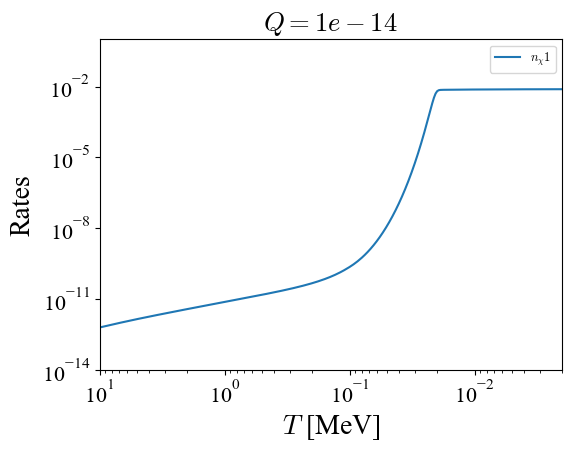

In [304]:
f, ax=plt.subplots()
f.set_figwidth(6)

ax.loglog(irr.T(alist), nx1/np.array([irr.n_e(i) for i in irr.T(alist)]),label=r'$n_\chi1$')
#ax.loglog(irr.T(alist), np.array([irr.n_e(i) for i in irr.T(alist)]),label=r'$n_e$')

ax.set_xlabel('$T$ [MeV]',fontsize=20)
ax.set_ylabel('Rates',fontsize=20)
ax.set_title(f"$Q={Q}$")
ax.set_xlim([10,10**(-2.7)])
ax.set_ylim([1e-14,1])
ax.legend(fontsize = 9)
f.tight_layout()
plt.show()

In [305]:
alist = np.logspace(-1.9, 4.5,num = 500)
gx3=Q*10**7
gx4=Q*10**7
MCP_A11 = np.pi*(gx4**2/(4*np.pi))**2/(mx1**2)*nx1
MCP_A21 = np.pi*(gx2**2/(4*np.pi))**2/(mx1**2)*nx1

MCP_A12 = np.pi*(gx4**2/(4*np.pi))**2/(mx2**2)*nx2
MCP_A22 = np.pi*(gx2**2/(4*np.pi))**2/(mx2**2)*nx2

MCP_A13 = np.pi*(gx4**2/(4*np.pi))**2/(mx3**2)*nx3
MCP_A23 = np.pi*(gx2**2/(4*np.pi))**2/(mx3**2)*nx3

MCP_A1 = np.pi*(gx4**2/(4*np.pi))**2/(mx3**2)*nx1**2
MCP_A2 = np.array([np.pi*(gx3**2/(4*np.pi))**2/(mx3*i) for i in irr.T(alist)])*nx1


In [347]:
def Q_H(mx,O):
    return (4*np.pi)**(1/2)*(0.35*mx**2/(O*np.pi*Mpl*7.46*10**(-7)))**(1/4)

In [357]:
gx1 = Q_H(mx1,6.28920558e-09)
gx2 = Q_H(mx2,6.67495353e-10)
print(gx1,gx2)

MCP_A1 = np.array([np.pi*(gx1**2/(4*np.pi))**2/(mx1*i) for i in irr.T(alist)])*nx1
MCP_A2 = np.array([np.pi*(gx2**2/(4*np.pi))**2/(mx2*i) for i in irr.T(alist)])*nx2

0.0011139766274014733 0.0006171815929554567


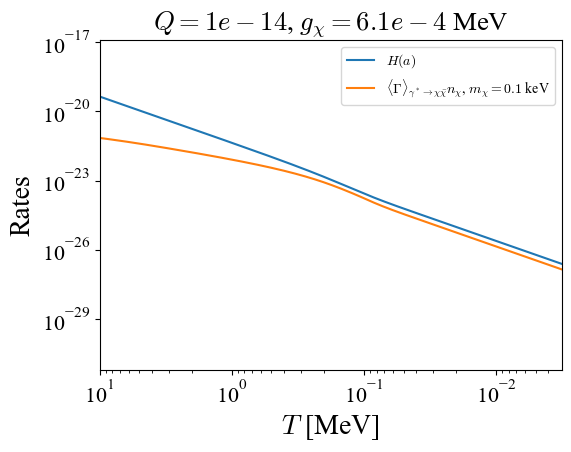

In [359]:
f, ax=plt.subplots()
f.set_figwidth(6)

ax.loglog(irr.T(alist), H1,label=r'$H(a)$')

#ax.loglog(irr.T(alist), MCP_A1,label=r'$\langle\Gamma\rangle_{\gamma^*\rightarrow\chi\bar{\chi}}n_\chi$, $m_\chi=1$ keV')
ax.loglog(irr.T(alist), MCP_A1,label=r'$\langle\Gamma\rangle_{\gamma^*\rightarrow\chi\bar{\chi}}n_\chi$, $m_\chi=0.1$ keV')

ax.set_xlabel('$T$ [MeV]',fontsize=20)
ax.set_ylabel('Rates',fontsize=20)
ax.set_title(f"$Q={Q}$, $g_\chi=6.1e-4$ MeV")
ax.set_xlim([10,10**(-2.5)])
#ax.set_ylim([1e-50,1e-22])
#ax.set_ylim([1e-20,100])
ax.legend(fontsize = 10)
f.tight_layout()
plt.show()

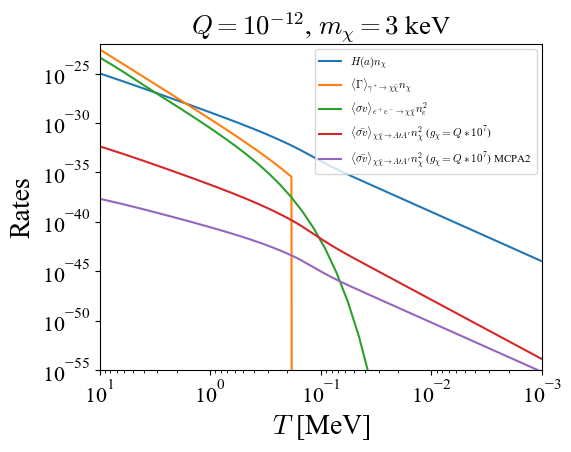

In [213]:
f, ax=plt.subplots()
f.set_figwidth(6)

ax.loglog(irr.T(alist), H1*nx1,label=r'$H(a)n_\chi$')
ax.loglog(Tlist, gamma_plas,label=r'$\langle\Gamma\rangle_{\gamma^*\rightarrow\chi\bar{\chi}}n_\chi$')
ax.loglog(Tlist, gamma_ann,label=r'$\langle\sigma v\rangle_{e^+e^-\rightarrow\chi\bar{\chi}}n_e^2$')
ax.loglog(irr.T(alist), MCP_A1,label=r'$\langle\bar{\sigma v}\rangle_{\chi\bar{\chi}\rightarrow A\prime A^\prime} n_\chi^2$ ($g_\chi=Q*10^7$)')
ax.loglog(irr.T(alist), MCP_A2,label=r'$\langle\bar{\sigma v}\rangle_{\chi\bar{\chi}\rightarrow A\prime A^\prime} n_\chi^2$ ($g_\chi=Q*10^7$) MCPA2')

ax.set_xlabel('$T$ [MeV]',fontsize=20)
ax.set_ylabel('Rates',fontsize=20)
ax.set_title(r"$Q=10^{-12}$, $m_\chi=3$ keV")
ax.set_xlim([10,1e-3])
ax.set_ylim([1e-55,1e-22])
#ax.set_ylim([1e-20,100])
ax.legend(fontsize = 8)
f.tight_layout()
plt.show()

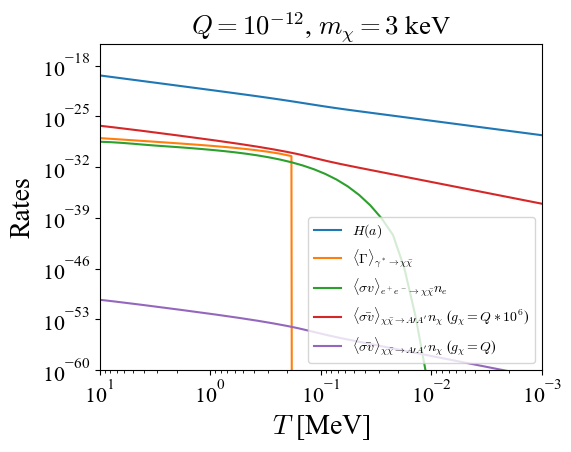

In [134]:
f, ax=plt.subplots()
f.set_figwidth(6)

ax.loglog(Tlist, H,label=r'$H(a)$')
ax.loglog(Tlist, gamma_plas1,label=r'$\langle\Gamma\rangle_{\gamma^*\rightarrow\chi\bar{\chi}}$')
ax.loglog(Tlist, gamma_ann1,label=r'$\langle\sigma v\rangle_{e^+e^-\rightarrow\chi\bar{\chi}}n_e$')
ax.loglog(irr.T(alist), MCP_A11,label=r'$\langle\bar{\sigma v}\rangle_{\chi\bar{\chi}\rightarrow A\prime A^\prime} n_\chi$ ($g_\chi=Q*10^6$)')
ax.loglog(irr.T(alist), MCP_A21,label=r'$\langle\bar{\sigma v}\rangle_{\chi\bar{\chi}\rightarrow A\prime A^\prime} n_\chi$ ($g_\chi=Q$)')

ax.set_xlabel('$T$ [MeV]',fontsize=20)
ax.set_ylabel('Rates',fontsize=20)
ax.set_title(r"$Q=10^{-12}$, $m_\chi=3$ keV")
ax.set_xlim([10,1e-3])
ax.set_ylim([1e-60,1e-15])
#ax.set_ylim([1e-20,100])
ax.legend(fontsize = 10)
f.tight_layout()
plt.show()

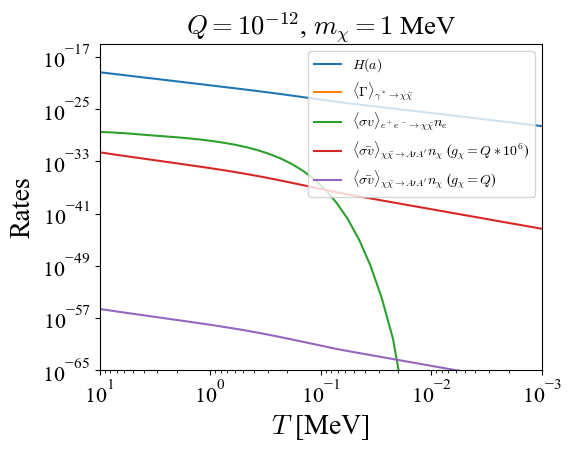

In [138]:
f, ax=plt.subplots()
f.set_figwidth(6)

ax.loglog(Tlist, H,label=r'$H(a)$')
ax.loglog(Tlist, gamma_plas2,label=r'$\langle\Gamma\rangle_{\gamma^*\rightarrow\chi\bar{\chi}}$')
ax.loglog(Tlist, gamma_ann2,label=r'$\langle\sigma v\rangle_{e^+e^-\rightarrow\chi\bar{\chi}}n_e$')
ax.loglog(irr.T(alist), MCP_A12,label=r'$\langle\bar{\sigma v}\rangle_{\chi\bar{\chi}\rightarrow A\prime A^\prime} n_\chi$ ($g_\chi=Q*10^6$)')
ax.loglog(irr.T(alist), MCP_A22,label=r'$\langle\bar{\sigma v}\rangle_{\chi\bar{\chi}\rightarrow A\prime A^\prime} n_\chi$ ($g_\chi=Q$)')

ax.set_xlabel('$T$ [MeV]',fontsize=20)
ax.set_ylabel('Rates',fontsize=20)
ax.set_title(r"$Q=10^{-12}$, $m_\chi=1$ MeV")
ax.set_xlim([10,1e-3])
ax.set_ylim([1e-65,1e-15])
#ax.set_ylim([1e-20,100])
ax.legend(fontsize = 10)
f.tight_layout()
plt.show()